## Dimensionality Reduction Notebook

In [489]:
import pandas as pd
import os
import matplotlib.pyplot as plt

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "unsupervised_learning"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

df = pd.read_csv('liked_songs_data.csv')
save_fig("liked_songs_data.head()")

df.head()

Saving figure liked_songs_data.head()


,name,artist,popularity,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,genre
0,Romance,Omeria,3,212459,5,0,4,0.017,0.971,0.297,0.601000,0.0924,-13.467,0.1770,0.271,122.005,"['ethnotronica', 'organic house']"
1,So soll es sein,Faber,45,182506,4,1,4,0.185,0.457,0.820,0.000044,0.1770,-6.446,0.0779,0.620,135.832,"['german indie', 'german rock', 'liedermacher'..."
2,Vivaldi - Live,Faber,29,200000,7,0,4,0.393,0.426,0.888,0.117000,0.9470,-7.346,0.0593,0.559,140.256,"['german indie', 'german rock', 'liedermacher'..."
3,Top - Live,Faber,25,226729,5,0,4,0.363,0.457,0.813,0.000043,0.9010,-7.208,0.0718,0.583,140.711,"['german indie', 'german rock', 'liedermacher'..."
4,Wem du's heute kannst besorgen,Faber,52,181666,5,0,4,0.199,0.607,0.788,0.000000,0.1720,-7.210,0.0393,0.781,99.212,"['german indie', 'german rock', 'liedermacher'..."


<Figure size 640x480 with 0 Axes>

## Data Exploration

Saving figure hist


<function matplotlib.pyplot.show(close=None, block=None)>

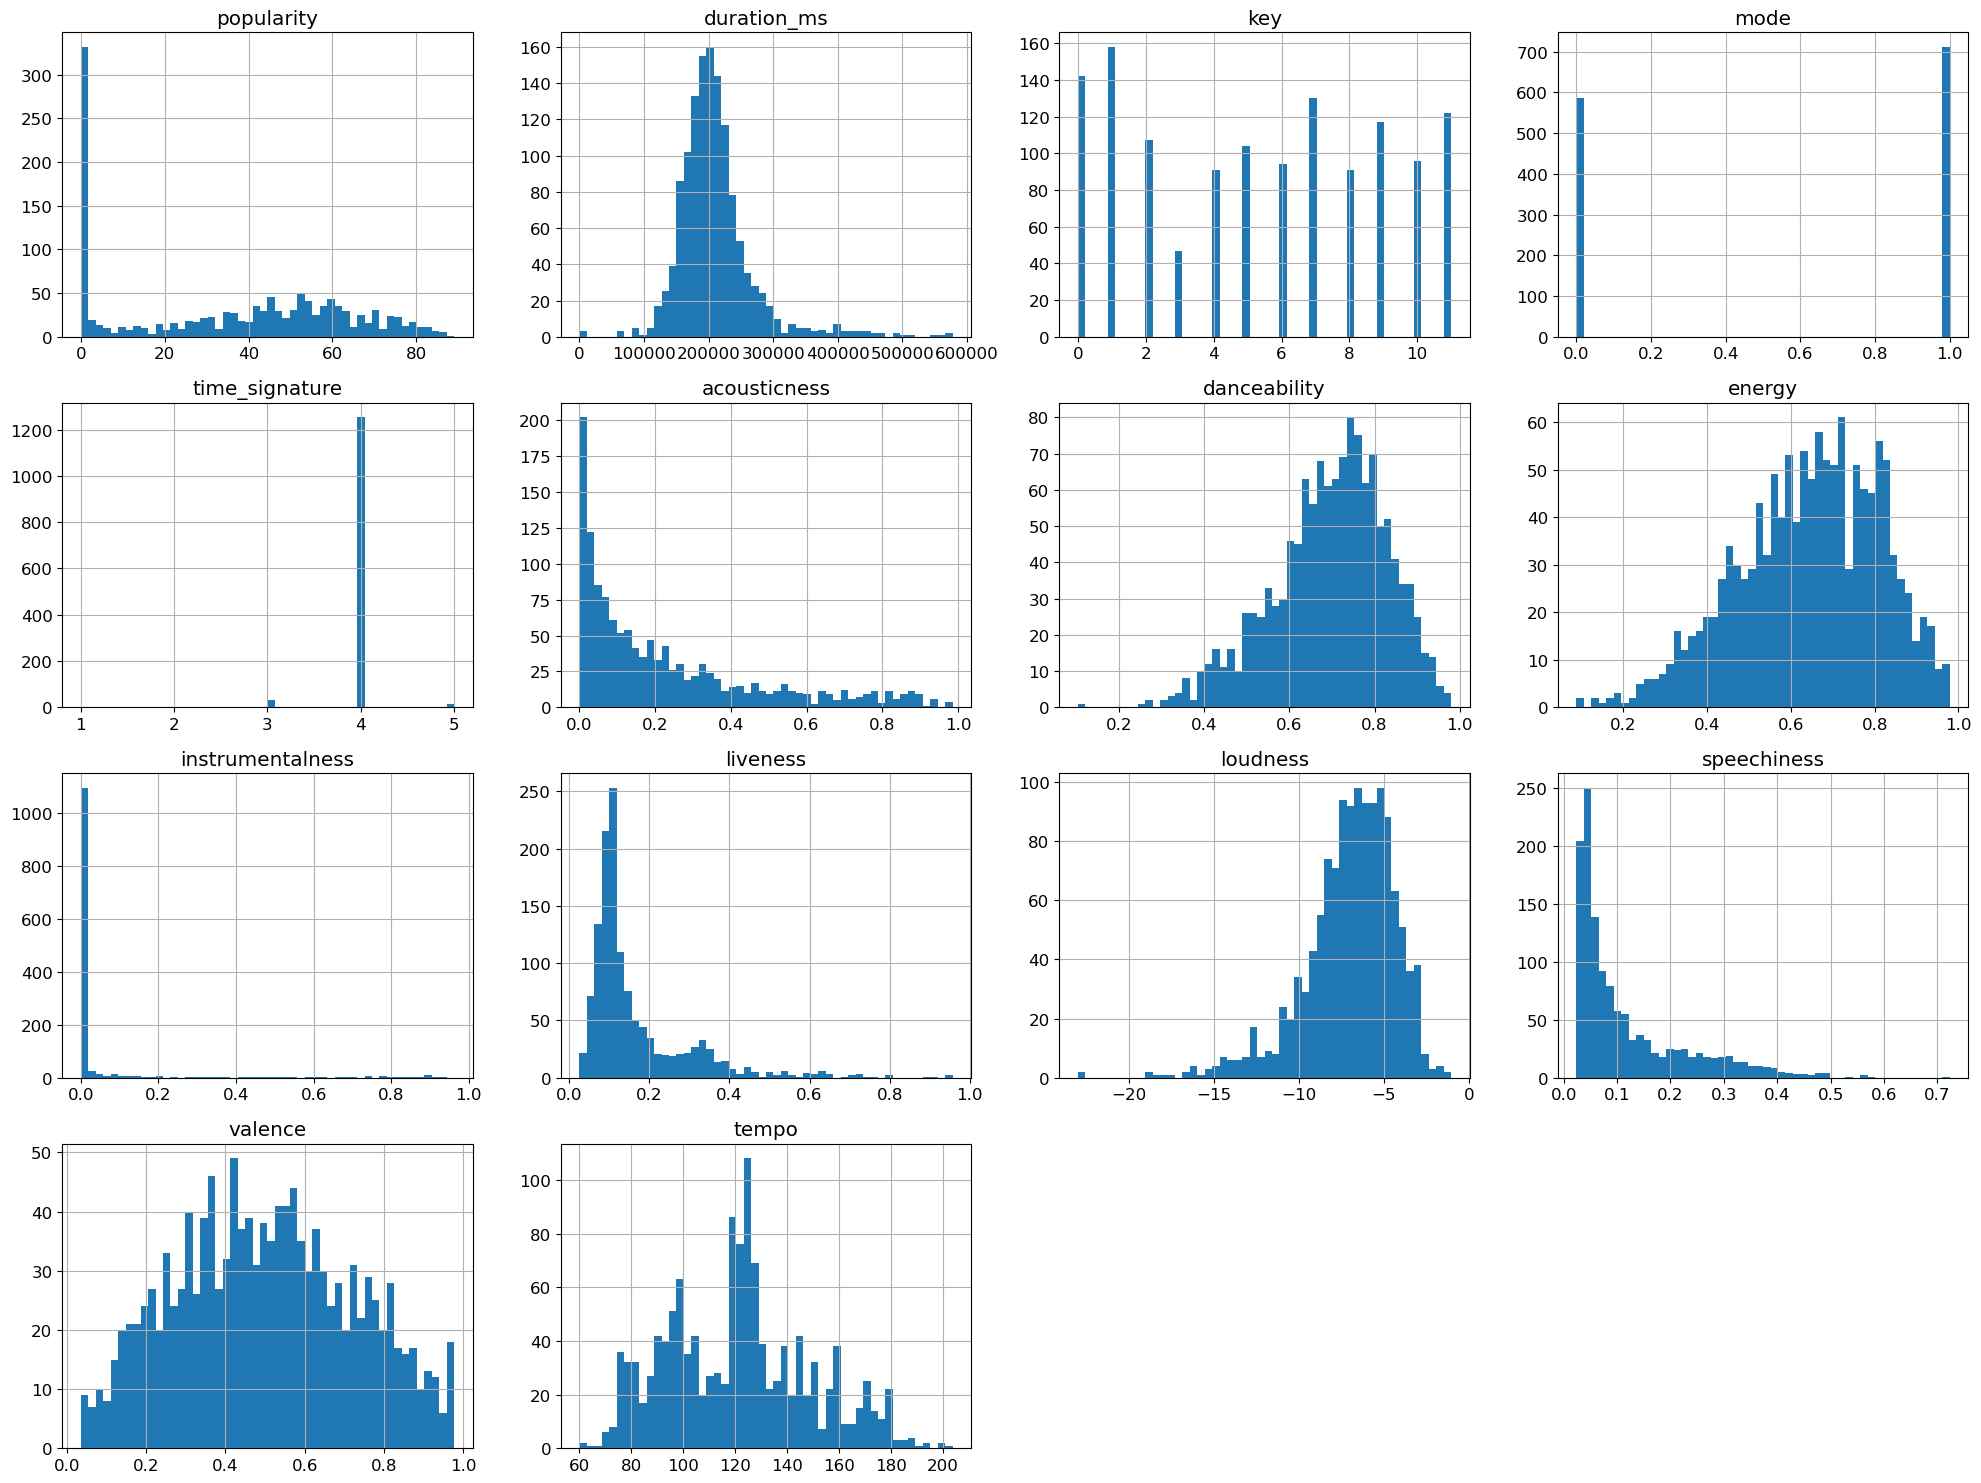

In [490]:
%matplotlib inline
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20,15))
save_fig("hist")

plt.show

In [491]:
df.describe()

,popularity,duration_ms,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
count,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000,1299.000000
mean,35.596613,210035.153195,5.353349,0.548114,3.984604,0.227293,0.696196,0.643568,0.058467,0.167241,-7.013156,0.120455,0.500505,121.265532
std,27.152009,59381.591621,3.646009,0.497871,0.203384,0.241642,0.133654,0.167890,0.183268,0.131093,2.716082,0.107020,0.222986,27.692887
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000078,0.103000,0.088200,0.000000,0.025800,-23.012000,0.024000,0.035300,60.068000
25%,1.000000,177093.500000,2.000000,0.000000,4.000000,0.039950,0.617000,0.530000,0.000000,0.091250,-8.265000,0.043900,0.333500,99.959500
50%,41.000000,201691.000000,6.000000,1.000000,4.000000,0.137000,0.712000,0.659000,0.000006,0.115000,-6.662000,0.073800,0.495000,121.993000
75%,58.000000,229640.000000,9.000000,1.000000,4.000000,0.333000,0.791000,0.774500,0.001560,0.192500,-5.163000,0.162000,0.668000,139.887000
max,89.000000,578040.000000,11.000000,1.000000,5.000000,0.986000,0.980000,0.979000,0.962000,0.957000,-1.047000,0.723000,0.977000,203.768000


In [492]:
df.dtypes

name                 object
artist               object
popularity            int64
duration_ms           int64
key                   int64
mode                  int64
time_signature        int64
acousticness        float64
danceability        float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
valence             float64
tempo               float64
genre                object
dtype: object

## Feature Engineering

In [493]:
# creat the PK column made up of song name and artis
PK = df['name'] +' : ' +df['artist']
df.insert(0, 'PK', PK)

# drop the 'name' and 'artist' columns
df = df.drop(['name', 'artist'], axis=1)

# droping high ordinal genre
# df = df.drop('genre', axis = 1)

# droping not relevant descriptive columns
df = df.drop(['popularity','duration_ms'], axis = 1) # 'mode', 'time_signature'


df.head()

,PK,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo,genre
0,Romance : Omeria,5,0,4,0.017,0.971,0.297,0.601000,0.0924,-13.467,0.1770,0.271,122.005,"['ethnotronica', 'organic house']"
1,So soll es sein : Faber,4,1,4,0.185,0.457,0.820,0.000044,0.1770,-6.446,0.0779,0.620,135.832,"['german indie', 'german rock', 'liedermacher'..."
2,Vivaldi - Live : Faber,7,0,4,0.393,0.426,0.888,0.117000,0.9470,-7.346,0.0593,0.559,140.256,"['german indie', 'german rock', 'liedermacher'..."
3,Top - Live : Faber,5,0,4,0.363,0.457,0.813,0.000043,0.9010,-7.208,0.0718,0.583,140.711,"['german indie', 'german rock', 'liedermacher'..."
4,Wem du's heute kannst besorgen : Faber,5,0,4,0.199,0.607,0.788,0.000000,0.1720,-7.210,0.0393,0.781,99.212,"['german indie', 'german rock', 'liedermacher'..."


### Creating df_OneHot for 'genre' feature

In [494]:
list = []
for i in df['genre']:
    list_str = i.strip('[]').split(',')
    for n in list_str:
        if n not in list:
            # print("genre:",n)
            list.append(n)
print(len(list))

673


In [495]:
# Create an empty dataframe
df_OneHot = pd.DataFrame(columns=list)

# Loop through df['genres']
for index, row in df.iterrows():
    df_OneHot.loc[index] = [0] * len(list)
    list_str = row['genre'].strip('[]').split(',')
    for n in list_str:
        
        # Ass genres to df_OneHot
        df_OneHot[n].loc[index] = 1

# Drop genre
df = df.drop('genre', axis = 1)
df_OneHot.head()

,'ethnotronica','organic house','german indie','german rock','liedermacher','swiss indie','austrian indie','german indie',,'hawaiian hip hop',...,'moombahton','metal','power metal','swedish metal','swedish power metal','pop soul','grime','piano rock','swedish soul','queens hip hop'
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Data Preprocessing


In [496]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
# from sklearn.preprocessing import Normalizer


numerical_cols = [cname for cname in df.columns if 
                df[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = StandardScaler()
# numerical_transformer  = Normalizer()

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
         ('num', numerical_transformer, numerical_cols)
     ])

df_prepared_np = preprocessor.fit_transform(df)

# df_prepared_np = numerical_transformer.fit_transform(df[numerical_cols])
pk_column = df['PK'].copy()
df = df.drop(columns=['PK'])

In [497]:
# Transform Np Array to Pd Dataframe
df_prepared_pd_PK = pd.DataFrame(df_prepared_np, columns=df.columns)
df_prepared_pd = pd.DataFrame(df_prepared_np, columns=df.columns)

# Concat Array & Df
# df_prepared_pd_PK = pd.concat([df_prepared_pd_PK,df_OneHot],1)
# df_prepared_pd = pd.concat([df_prepared_pd,df_OneHot],1)

# Add PK
df_prepared_pd_PK.insert(0, 'PK', pk_column)
df_prepared_pd_PK.head()

,PK,key,mode,time_signature,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,Romance : Omeria,-0.096951,-1.101339,0.07573,-0.870604,2.056868,-2.065055,2.961459,-0.571120,-2.377075,0.528561,-1.029632,0.026713
1,So soll es sein : Faber,-0.371329,0.907986,0.07573,-0.175092,-1.790352,1.051287,-0.318907,0.074474,0.208894,-0.397794,0.536092,0.526203
2,Vivaldi - Live : Faber,0.451805,-1.101339,0.07573,0.686019,-2.022383,1.456471,0.319507,5.950444,-0.122593,-0.571660,0.262427,0.686017
3,Top - Live : Faber,-0.096951,-1.101339,0.07573,0.561820,-1.790352,1.009577,-0.318911,5.599412,-0.071765,-0.454815,0.370099,0.702453
4,Wem du's heute kannst besorgen : Faber,-0.096951,-1.101339,0.07573,-0.117133,-0.667622,0.860612,-0.319147,0.036318,-0.072502,-0.758614,1.258389,-0.796668


## Choosing the number of dimensions

#### For learning purposes
Number of dimensions should add up to 95% of variance
For bigger datasets a reduction of features is interesting
For this example it is only necessary for visualization purposes



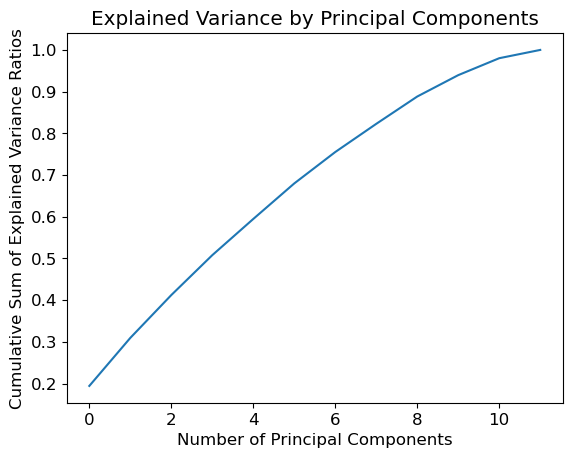

In [498]:
from sklearn.decomposition import PCA
import numpy as np

# run PCA and compute explained variance ratios
pca = PCA()
pca.fit(df_prepared_np) # df_prepared_np
cumsum = np.cumsum(pca.explained_variance_ratio_)

# plot cumulative sum of explained variance ratios
plt.plot(cumsum)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Sum of Explained Variance Ratios')
plt.title('Explained Variance by Principal Components')
plt.show()



In [499]:
import plotly.express as px
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

pca = PCA()
pca.fit(df_prepared_pd)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

In [500]:

pca.fit(df_prepared_pd) # df_prepared_np

# get explained variance ratios for each feature
variance_ratios = pca.explained_variance_ratio_

# create pandas DataFrame with column names and variance ratios
variance_df = pd.DataFrame({'Feature': df_prepared_pd.columns, 'Variance Ratio': variance_ratios})

# print DataFrame
print(variance_df)


             Feature  Variance Ratio
0                key        0.194266
1               mode        0.115192
2     time_signature        0.102715
3       acousticness        0.095684
4       danceability        0.086808
5             energy        0.085218
6   instrumentalness        0.075298
7           liveness        0.067552
8           loudness        0.065531
9        speechiness        0.051273
10           valence        0.040605
11             tempo        0.019857


In [501]:
"""
# Define the features and data
features = ['key', 'mode', 'time_signature']
data = df_prepared_pd[features].values
mode = df_prepared_pd['mode'].values

# Create the scatter plot
plt.scatter(data[:, 0], data[:, 1], c=mode, cmap='viridis')
plt.xlabel(features[0])
plt.ylabel(features[1])
plt.colorbar()

# Add a title and display the plot
plt.title('PCA Feature Scatter Plot')
plt.show()
"""

"\n# Define the features and data\nfeatures = ['key', 'mode', 'time_signature']\ndata = df_prepared_pd[features].values\nmode = df_prepared_pd['mode'].values\n\n# Create the scatter plot\nplt.scatter(data[:, 0], data[:, 1], c=mode, cmap='viridis')\nplt.xlabel(features[0])\nplt.ylabel(features[1])\nplt.colorbar()\n\n# Add a title and display the plot\nplt.title('PCA Feature Scatter Plot')\nplt.show()\n"

In [502]:
"""
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit_transform(df_prepared_np)
"""


'\nfrom sklearn.decomposition import PCA\npca = PCA(n_components=0.95)\npca.fit_transform(df_prepared_np)\n'

## Visualizing the data

#### t-SNE Analysis

c:\Users\marlo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\marlo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



Saving figure t-SNE Plot 2D


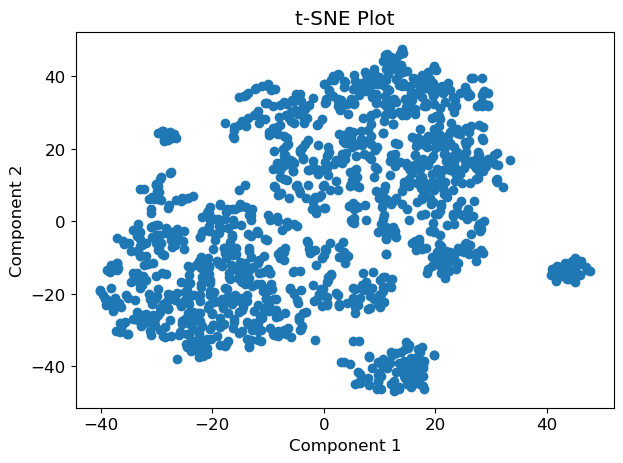

In [503]:
from sklearn.manifold import TSNE
%matplotlib inline
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(df_prepared_pd)

plt.scatter(X_tsne[:,0], X_tsne[:,1])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Plot')
save_fig("t-SNE Plot 2D")

plt.show()


c:\Users\marlo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\marlo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



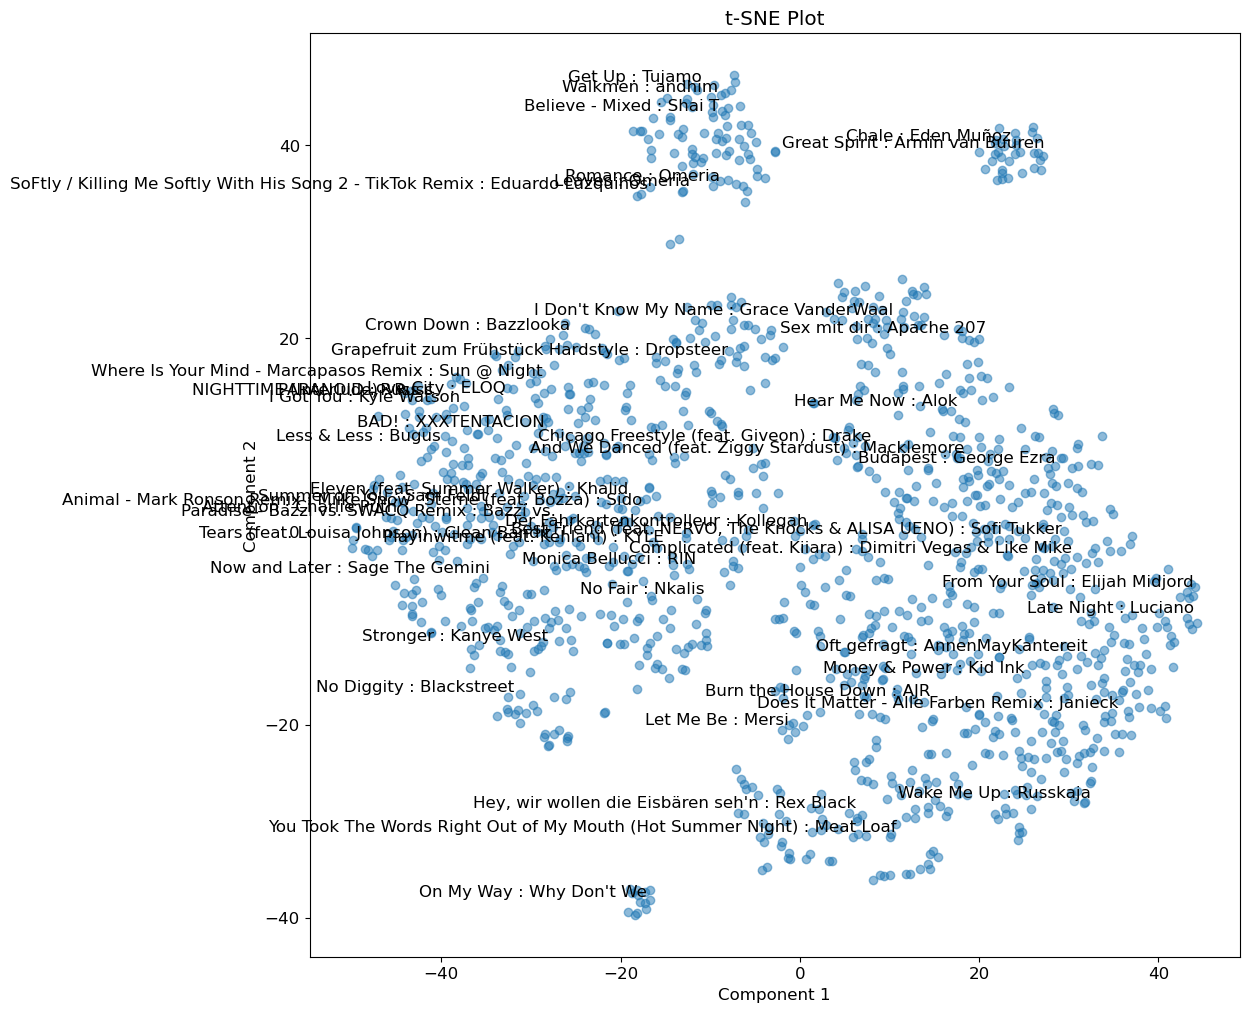

In [504]:
# Define the figure size and font size for the plot
plt.figure(figsize=(12, 12))
plt.rcParams.update({'font.size': 12})

# Generate the t-SNE plot
X_tsne = tsne.fit_transform(df_prepared_pd)

# Plot the points
plt.scatter(X_tsne[:,0], X_tsne[:,1], alpha=0.5)

# Add annotations for the names
for i, name in enumerate(df_prepared_pd_PK['PK']):
    x, y = X_tsne[i,0], X_tsne[i,1]
    if i % 26 == 0: # Only display every 5th name to prevent clutter
        plt.annotate(name, xy=(x,y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

# Add axis labels and a title
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('t-SNE Plot')

# Show the plot
plt.show()


## t-SNE Modelling

In [505]:
import plotly.express as px
from sklearn.manifold import TSNE

tsne = TSNE(n_components=3) #, verbose=1
components = tsne.fit_transform(df_prepared_pd)
my_list = [2] * len(df_prepared_pd)

fig = px.scatter_3d(
    components, x=0, y=1, z=2, 
    title='Interactive t-SNE Plot with tempo', color = df_prepared_pd["tempo"],
    opacity=0.7,
    size=my_list,
    # symbol = df_prepared_pd_PK['PK']
)

fig.update_layout(width=700, height=400,margin=dict(l=0, r=0, b=0, t=0))

c:\Users\marlo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

c:\Users\marlo\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



In [506]:
fig = px.scatter_3d(
    components, x=0, y=1, z=2, 
    title='Interactive t-SNE Plot', color = df_prepared_pd["speechiness"],
    opacity=0.7,
    # labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3',}
    size=my_list,
    # symbol = df_prepared_pd_PK['PK']
)
# fig.show()
# tight layout
fig.update_layout(width=700, height=400,margin=dict(l=0, r=0, b=0, t=0))

In [507]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

clustering = AgglomerativeClustering(n_clusters=9).fit(components)

print(np.unique(clustering.labels_))

AgglomerativeClustering_per_k = [AgglomerativeClustering(n_clusters=k).fit(components)
                for k in range(1, 25)]
silhouette_scores = [silhouette_score(components, clustering.labels_)
                     for clustering in AgglomerativeClustering_per_k[1:]]

n = 10
idx = sorted(range(len(silhouette_scores)), key=lambda i: silhouette_scores[i], reverse=True)[:n]

# Print values and their corresponding indexes
for i in idx:
    print("Clusters:", i+2, "/  Value:", silhouette_scores[i])


[0 1 2 3 4 5 6 7 8]
Clusters: 3 /  Value: 0.4095053
Clusters: 2 /  Value: 0.398515
Clusters: 4 /  Value: 0.33317205
Clusters: 5 /  Value: 0.3092567
Clusters: 24 /  Value: 0.29828954
Clusters: 23 /  Value: 0.29670978
Clusters: 22 /  Value: 0.2922172
Clusters: 9 /  Value: 0.28870893
Clusters: 21 /  Value: 0.28724343
Clusters: 18 /  Value: 0.28633985


In [ ]:
# df_prepared_pd.to_csv('df_prepared_pd.csv', index=False)
df_prepared_pd_PK.to_csv('df_prepared_pd_PK.csv', index=False)
np.savetxt("components.csv", components, delimiter=",")
print(len(components))
print(components[0])


1299
[-15.288968    5.5712695  -5.0892515]


### Dynamic visualizations online retrievable using Pyplot & chart_studio

In [ ]:
# !pip install chart-studio

In [509]:
import chart_studio
username='username'
api_key='api_key'
chart_studio.tools.set_credentials_file(username=username,
                                        api_key=api_key)

In [512]:
# my_list = [2] * len(df_prepared_pd)

# tsne = TSNE(n_components=3) #, verbose=1
# components = tsne.fit_transform(df_prepared_pd)
# df_dp = pd.DataFrame(components, columns=['x', 'y', 'z'])

fig = px.scatter_3d(
    components, x=0, y=1, z=2, 
    title='Interactive t-SNE Plot', color = df_prepared_pd["tempo"],
    opacity=0.7,
    # labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3',}
    size=my_list,
    # symbol = df_prepared_pd_PK['PK']
)
fig.update_layout(width=700, height=400,margin=dict(l=0, r=0, b=0, t=0))

In [513]:
import chart_studio.plotly as py

py.plot(fig, filename="t-SNE Plot - Tempo", auto_open = True)


'https://plotly.com/~MarlonH/10/'

## Other approaches

##### Datapane
import datapane as dp 
dp.login(token="ac2d9f153f11b2ab6a73efaf62f4d006f6d14e89")
##### Using Page and Plot
page = Page(blocks=[dp.Plot(fig)])
# Publish the page
dp.Report(page).publish(name="3D Scatter Plot Report", open=True)